In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
from time import sleep
import json

## Load the json file

In [2]:
with open('movie_detail.json', 'r') as f:
    movie_detail=json.load(f)

# Clean the data

In [3]:
clean_data = {'id':[],'runtime':[],'genres':[],'keywords':[],'production_companies':[],'age_rating':[],'actor':[],
              'budget':[], 'popularity':[]}
i=0
for movie in movie_detail:
    if(i==6106):
        break
    i+=1
    st = False
    #print(movie["release_dates"]['results'])
    for certification in movie["release_dates"]['results']:
        if (certification["iso_3166_1"] == 'US'):
            st = True
            clean_data['age_rating'].append(certification['release_dates'][0]["certification"])
            break
    
    if st==False:
        continue
        
    # id
    clean_data['id'].append(movie['id'])
    
    # runtime
    clean_data['runtime'].append(movie['runtime'])
    
    #genres
    genres_list = []
    for genre in movie['genres']:
        genres_list.append(genre['id'])
    clean_data['genres'].append(genres_list)
    keywords_list = []
    for keywords in movie['keywords']['keywords']:
        keywords_list.append(keywords['name'])
    clean_data['keywords'].append(keywords_list)
    production_companies = []
    for production in movie['production_companies']:
        production_companies.append(production['id'])
    clean_data['production_companies'].append(production_companies)
    
    #Cast
    actor_list = []
    for actor in movie['credits']['cast']:
        actor_list.append(actor['id'])
    clean_data['actor'].append(actor_list)
    
    #budget
    clean_data['budget'].append(movie['budget'])

    #budget
    clean_data['popularity'].append(movie['popularity'])
    

In [4]:
df_clean_data = pd.DataFrame(clean_data)
df_clean_data

,id,runtime,genres,keywords,production_companies,age_rating,actor,budget,popularity
0,527774,107,"[16, 12, 14, 10751, 28]","[kung fu, trip, sword, warrior woman, computer...","[2, 6125]",PG,"[1663195, 1625558, 2362044, 97576, 18307, 3008...",0,4135.696
1,587807,101,"[28, 35, 10751, 16, 12]","[computer animation, racial stereotype, live a...","[25120, 174, 8922, 77061]",PG,"[13620, 33923, 15098, 15831, 224092, 1688196, ...",50000000,2347.397
2,484718,110,[35],"[africa, prince, heir to the throne, sequel, q...","[4, 114732, 30, 11581, 20580]",PG-13,"[776, 44994, 1488960, 168452, 56903, 1884703, ...",60000000,1643.016
3,458576,104,"[14, 28, 12]","[female soldier, another dimension, bow and ar...","[7220, 47, 248, 81620, 882, 3287, 34]",PG-13,"[63, 57207, 76126, 2372, 935201, 22122, 105605...",60000000,1765.484
4,464052,151,"[14, 28, 12]","[dc comics, superhero, based on comic, 1980s, ...","[9993, 174, 114152, 128064, 507, 429]",PG-13,"[90633, 62064, 41091, 1253360, 32, 935, 182998...",200000000,1914.199
...,...,...,...,...,...,...,...,...,...
5462,25749,92,"[53, 27]","[chicago, illinois, telekinesis, cult, blood s...","[15343, 4416]",R,"[133665, 133968, 79740, 133969, 133970, 42743,...",0,14.252
5463,57718,16,"[16, 28, 35, 10751]",[],[521],PG,"[23659, 212, 1677820, 1784320, 583872, 76745, ...",0,16.255
5464,9517,113,"[80, 18]","[rape, florida, striptease, sadism, conspiracy...","[694, 126041, 15231, 8682]",,"[51214, 6408, 54126, 10692, 32598, 11671, 5738...",0,14.902
5465,15997,73,"[16, 10751, 12]","[tyrannosaurus rex, triceratops, brontosaurus,...",[4285],G,"[79020, 71447, 79021, 34982, 43125, 586496, 96...",0,15.000


In [5]:
word_list = []
for l in df_clean_data['keywords'].tolist():
    word_list += l
word_list

['kung fu',
 'trip',
 'sword',
 'warrior woman',
 'computer animation',
 'dragon',
 'vietnamese',
 'south asian',
 'warrior',
 'computer animation',
 'racial stereotype',
 'live action and animation',
 'rapping animal',
 'autotune',
 'africa',
 'prince',
 'heir to the throne',
 'sequel',
 'queens, new york city',
 'female soldier',
 'another dimension',
 'bow and arrow',
 'based on video game',
 'swordswoman',
 'dimensional travel',
 'giant monsters',
 'dc comics',
 'superhero',
 'based on comic',
 '1980s',
 'action hero',
 'dc extended universe',
 'revenge',
 'car crash',
 'person on fire',
 'convict',
 'rapist',
 'prisoner transport',
 'android',
 'space colony',
 'space opera',
 'space adventure',
 'spaceship',
 'ecological disaster',
 'post traumatic stress disorder',
 'rape',
 'marseille, france',
 'army',
 'revenge',
 'siblings',
 'detective',
 'serial killer',
 'los angeles, california',
 '1990s',
 'cyborg',
 'nuclear missile',
 'war',
 'based on novel or book',
 'love',
 'teena

In [6]:
from gensim.models import Word2Vec

In [168]:
model = Word2Vec([word_list], size= 100, window=10 , min_count = 5)

In [35]:
model.most_similar('police')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('acid', 0.41297784447669983),
 ('sledgehammer', 0.37398672103881836),
 ('ethiopian jews', 0.3330416679382324),
 ('mi5', 0.319441020488739),
 ('mossad', 0.31591954827308655),
 ('sex video', 0.3152707815170288),
 ('growing up', 0.31090736389160156),
 ('sharemarket fraud', 0.3064883053302765),
 ('romantic triangle', 0.30380046367645264),
 ('lowrider', 0.30331459641456604)]

In [36]:
from sklearn.manifold import TSNE

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word, topn=20)

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

In [171]:
display_closestwords_tsnescatterplot(model, "sex videos", 100)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  


KeyError: "word 'sex videos' not in vocabulary"

In [39]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [58]:
axes = [0, 1, 2]
# To differentiate groups in the graph, you can give the labels a corresponding color or font size
# e.g. words in the first group will be red, words in the second group will be blue, etc.

# Color of words in each group, uses default if too many groups
# Dark colors are good for matplotlib's white background, use hex or https://matplotlib.org/gallery/color/named_colors.html
colors = ["tab:red", "tab:blue", "tab:green", "tab:orange",
          "tab:purple", "tab:olive", "tab:pink", "tab:cyan", "tab:gray"]
defaultcolor = "black"

# Font sizes of words in each group
sizes = []
defaultsize = 16

In [176]:
def plot2D(result, wordgroups):
    plt.scatter(result[:, axes[0]], result[:, axes[1]])
    for g, group in enumerate(wordgroups):
        for word in group:
            if not word in words:
                continue
            i = words.index(word)
            # Create plot point
            coord = (result[i, axes[0]], result[i, axes[1]])
            color = colors[g] if g < len(colors) else defaultcolor
            size = sizes[g] if g < len(sizes) else defaultsize
            plt.annotate(word, xy=coord, color=color, fontsize=size)


def plot3D(result, wordgroups):
    fig = plt.figure(figsize = (50,50))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(result[:, axes[0]], result[:, axes[1]], result[:, axes[2]])
    for g, group in enumerate(wordgroups):
        for word in group:
            if not word in words:
                continue
            i = words.index(word)
            # 
            if(i>= len(result)):
                continue
            #
            # Create plot point
            color = colors[g] if g < len(colors) else defaultcolor
            size = sizes[g] if g < len(sizes) else defaultsize
            
            
            
            ax.text(result[i, axes[0]], result[i, axes[1]],
                    result[i, axes[2]], word, color=color, fontsize=size)


def get_groups(wordf, model):
    words = wordf
    groups = []


    # Get word vectors from model
    vecs = {w: model.wv.vocab[w] for w in words if w in model.wv.vocab}

    # Assign groups if using clustering
    clusterK= 100
    estimator = KMeans(init='k-means++', n_clusters=clusterK, n_init=30)
    estimator.fit_predict(model.wv[vecs])
    groups = [[] for n in range(clusterK)]
    for i, w in enumerate(vecs.keys()):
        group = estimator.labels_[i]
        groups[group].append(w)

    return words, groups, vecs


In [177]:
# Get groups from file or by clustering
words, groups, vecs = get_groups(word_list, model)

coords = model.wv[vecs]

# Create axes to plot on
pca = PCA(n_components=max(axes)+1)
result = pca.fit_transform(coords)



In [ ]:
# Plot vectors on axes
if len(axes) > 2:
    plot3D(result, groups)
else:
    plot2D(result, groups)
plt.show()

In [189]:
len(groups)

100

In [188]:
for i in groups:
    if 'ice ' in i:
        print(i)

['female soldier', 'king kong', 'police detective', 'sister sister relationship', 'biological weapon', 'phone call', 'ex-con', 'immigrant', 'donkey', 'parenting', 'bridge', 'satanic cult', 'mansion', 'malibu', 'murder investigation', 'alaska', 'interpol', 'death star', 'punk rock', 'chinese', 'social satire', 'tunnel', 'archer', 'gay theme', 'married couple', 'alternate reality', 'falling in love', 'concert', 'lake', 'zebra', 'pet', 'nudity', 'madness', 'family holiday', 'date', 'outlaw', 'insomnia', 'knife', 'anthology', 'cuba', 'ritual', 'nanny', 'nuclear radiation', 'ancient rome', 'smuggling']


In [147]:
model.wv(vecs)

array([-0.00095592, -0.00388551,  0.00157775,  0.00444844,  0.00103845,
        0.00486092,  0.00469329,  0.0004706 , -0.00224819, -0.00577452,
       -0.0040918 , -0.00250792,  0.00121521, -0.00064154,  0.00461591,
       -0.00421211,  0.00215536,  0.00412204,  0.00382995, -0.00344426,
       -0.00001229, -0.00041364, -0.00372594,  0.00047615, -0.00315317,
       -0.00016033, -0.0044565 ,  0.00280078, -0.00437864,  0.00110728,
       -0.00297341,  0.00149178,  0.00258379,  0.00075327,  0.00392166,
        0.0011681 ,  0.0020765 ,  0.00382724,  0.00336319,  0.00317197,
        0.00032526, -0.00438256, -0.00400956,  0.00134264,  0.00104797,
       -0.00231953,  0.00236695,  0.00126438, -0.00242299, -0.00321126,
       -0.00110961,  0.00111696,  0.00306911, -0.00214028,  0.00167832,
        0.00428322,  0.00427627, -0.00433269,  0.00000285, -0.00097139,
        0.00179746,  0.00231422, -0.00272837,  0.00453184, -0.00255951,
       -0.00019002,  0.00129476,  0.0001388 ,  0.00035594, -0.00

# THIS IS A TOTALLY NEW THINGS

In [152]:
genres_list = {}
i=0
for movie in movie_detail:
    if(i==6106):
        break
    i+=1
    for genre in movie['genres']:
        genres_list[genre['id']]=genre['name']
genres_list

{16: 'Animation',
 12: 'Adventure',
 14: 'Fantasy',
 10751: 'Family',
 28: 'Action',
 35: 'Comedy',
 80: 'Crime',
 53: 'Thriller',
 18: 'Drama',
 878: 'Science Fiction',
 10749: 'Romance',
 27: 'Horror',
 9648: 'Mystery',
 10402: 'Music',
 10770: 'TV Movie',
 36: 'History',
 10752: 'War',
 37: 'Western',
 99: 'Documentary'}

In [153]:
genres_list

{16: 'Animation',
 12: 'Adventure',
 14: 'Fantasy',
 10751: 'Family',
 28: 'Action',
 35: 'Comedy',
 80: 'Crime',
 53: 'Thriller',
 18: 'Drama',
 878: 'Science Fiction',
 10749: 'Romance',
 27: 'Horror',
 9648: 'Mystery',
 10402: 'Music',
 10770: 'TV Movie',
 36: 'History',
 10752: 'War',
 37: 'Western',
 99: 'Documentary'}

In [160]:
for i in df_clean_data[df_clean_data['age_rating'] == 'NC-17']['keywords']:
    print(i)

['based on manga']
['martial arts', 'ex-cop', 'remote island', 'island prison', 'revenge plot']
['remake']
['alien', 'based on manga', 'alien invasion', 'shape shifter', 'mother son relationship']
['bigfoot', 'hairy']
['magic', 'supernatural', 'based on light novel', 'anime']
['notebook', 'based on manga', 'death', 'anime', 'based on anime']
['zombie apocalypse', 'virus']
['supernatural', 'mafia', 'super power', 'anime']
['cyberpunk', 'alternate reality', 'matrix']
['sexual obsession', 'adultery', 'sadistic', 'sexuality', 'husband wife relationship', 'eroticism', 'car journey', 'simulation', 'dead wish', 'fetish', 'wound', 'fetishism', 'masochism', 'deceived husband', 'dying and death', 'pain', 'james dean', 'sadism', 'marriage crisis', 'cult', 'car accident']
['invasion', 'brooklyn, new york city']
['sequel', 'truck driver']
['dancing', 'rape', 'bondage', 'photographer', 'nightclub', 'pregnancy', 'degradation', 'unfaithfulness', 'bound and gagged', 'birth', 'bullfighter', 'woman direc

In [162]:
df_clean_data[df_clean_data['age_rating'] == 'NC-17']

,id,runtime,genres,keywords,production_companies,age_rating,actor,budget,popularity
274,433945,119,"[28, 18, 27, 53]",[based on manga],[18835],NC-17,"[1087773, 1149337, 1202404, 40450, 84028, 1401...",0,95.411
356,557968,102,[28],"[martial arts, ex-cop, remote island, island p...","[19349, 71853, 113550, 19350]",NC-17,"[1624033, 93999, 117504, 115904, 2218533, 1385...",0,77.856
591,531503,86,"[28, 53]",[remake],[99321],NC-17,"[53650, 81685, 4726, 970219, 151432, 116263, 1...",0,61.604
727,282069,109,"[878, 27]","[alien, based on manga, alien invasion, shape ...","[1778, 41861, 11848, 77117, 6755, 12386, 11327...",NC-17,"[1018944, 110058, 559413, 2542, 1185386, 13275...",0,51.573
740,512936,85,"[27, 28]","[bigfoot, hairy]",[],NC-17,"[138860, 1131217, 1684327, 84227, 1433400, 253...",0,48.584
1378,431821,90,"[878, 28, 16, 14]","[magic, supernatural, based on light novel, an...","[91520, 30294]",NC-17,"[1221114, 221773, 1321070, 1241611, 1258552, 1...",0,37.904
1517,351460,101,"[14, 27, 53]","[notebook, based on manga, death, anime, based...","[829, 2723]",NC-17,"[232006, 1200864, 5293, 1392137, 74242, 80122,...",40000000,29.837
1676,75735,90,"[28, 27, 878]","[zombie apocalypse, virus]",[1311],NC-17,"[10182, 343, 76227, 515875, 168875, 211900, 20...",0,28.982
1752,483455,90,"[16, 28, 35, 9648, 80, 14]","[supernatural, mafia, super power, anime]",[2849],NC-17,"[1065297, 93803, 553959, 1247956, 81244, 13250...",0,33.235
1886,55931,102,"[16, 878]","[cyberpunk, alternate reality, matrix]","[1885, 3464, 11671, 89136, 174]",NC-17,"[6384, 530, 56347, 21063, 89251, 31531, 24362,...",5000000,29.171


In [191]:
df= df_clean_data
df_clean_data_clean = df[ df['age_rating'].isin( ['R','PG','NC-17','G','PG-13'] )]

In [193]:
df_clean_data_clean.reset_index(inplace=True)
df_clean_data_clean

,index,id,runtime,genres,keywords,production_companies,age_rating,actor,budget,popularity
0,0,527774,107,"[16, 12, 14, 10751, 28]","[kung fu, trip, sword, warrior woman, computer...","[2, 6125]",PG,"[1663195, 1625558, 2362044, 97576, 18307, 3008...",0,4135.696
1,1,587807,101,"[28, 35, 10751, 16, 12]","[computer animation, racial stereotype, live a...","[25120, 174, 8922, 77061]",PG,"[13620, 33923, 15098, 15831, 224092, 1688196, ...",50000000,2347.397
2,2,484718,110,[35],"[africa, prince, heir to the throne, sequel, q...","[4, 114732, 30, 11581, 20580]",PG-13,"[776, 44994, 1488960, 168452, 56903, 1884703, ...",60000000,1643.016
3,3,458576,104,"[14, 28, 12]","[female soldier, another dimension, bow and ar...","[7220, 47, 248, 81620, 882, 3287, 34]",PG-13,"[63, 57207, 76126, 2372, 935201, 22122, 105605...",60000000,1765.484
4,4,464052,151,"[14, 28, 12]","[dc comics, superhero, based on comic, 1980s, ...","[9993, 174, 114152, 128064, 507, 429]",PG-13,"[90633, 62064, 41091, 1253360, 32, 935, 182998...",200000000,1914.199
...,...,...,...,...,...,...,...,...,...,...
4147,5461,51248,90,"[27, 53]",[sibling relationship],"[50491, 9968, 7660, 7662]",PG-13,"[158733, 57428, 168529, 1077758, 58287, 229927...",0,16.505
4148,5462,25749,92,"[53, 27]","[chicago, illinois, telekinesis, cult, blood s...","[15343, 4416]",R,"[133665, 133968, 79740, 133969, 133970, 42743,...",0,14.252
4149,5463,57718,16,"[16, 28, 35, 10751]",[],[521],PG,"[23659, 212, 1677820, 1784320, 583872, 76745, ...",0,16.255
4150,5465,15997,73,"[16, 10751, 12]","[tyrannosaurus rex, triceratops, brontosaurus,...",[4285],G,"[79020, 71447, 79021, 34982, 43125, 586496, 96...",0,15.000


In [194]:
hash_table = {
    'R':4,
    'PG':2,
    'NC-17':5,
    'G':1,
    'PG-13':3
}

In [195]:
keyword_age = {'keyword':[],'age_rating':[]}

for i in range(4152):
    #print(df_hash_to_num['genres'][5])
    for keyword_id in df_clean_data_clean['keywords'][i]:
        j = 0
        for g in groups:
            
            if keyword_id in g:
                keyword_age['age_rating'].append(hash_table[df_clean_data_clean['age_rating'][i]])
                keyword_age['keyword'].append(j)
            j+=1
keyword_age

{'keyword': [91,
  59,
  72,
  34,
  76,
  84,
  34,
  29,
  50,
  50,
  25,
  4,
  18,
  55,
  25,
  8,
  24,
  89,
  4,
  70,
  11,
  84,
  39,
  65,
  29,
  90,
  8,
  1,
  11,
  64,
  61,
  4,
  47,
  45,
  3,
  31,
  24,
  83,
  47,
  15,
  83,
  98,
  78,
  68,
  41,
  41,
  24,
  89,
  4,
  86,
  15,
  84,
  4,
  34,
  8,
  67,
  16,
  99,
  25,
  34,
  82,
  24,
  4,
  12,
  84,
  84,
  24,
  24,
  49,
  56,
  8,
  87,
  18,
  25,
  52,
  63,
  36,
  29,
  20,
  69,
  0,
  40,
  87,
  12,
  85,
  38,
  55,
  97,
  97,
  60,
  94,
  17,
  14,
  45,
  11,
  99,
  30,
  90,
  8,
  4,
  33,
  18,
  2,
  33,
  11,
  4,
  68,
  53,
  33,
  24,
  50,
  65,
  15,
  63,
  20,
  4,
  1,
  82,
  37,
  54,
  70,
  84,
  37,
  78,
  36,
  91,
  74,
  47,
  54,
  78,
  12,
  88,
  4,
  4,
  36,
  15,
  70,
  14,
  8,
  18,
  84,
  37,
  87,
  14,
  25,
  25,
  52,
  24,
  22,
  24,
  87,
  89,
  4,
  8,
  46,
  54,
  46,
  86,
  81,
  24,
  70,
  87,
  21,
  89,
  86,
  1,
  90,
  18,
  88,


<AxesSubplot:>

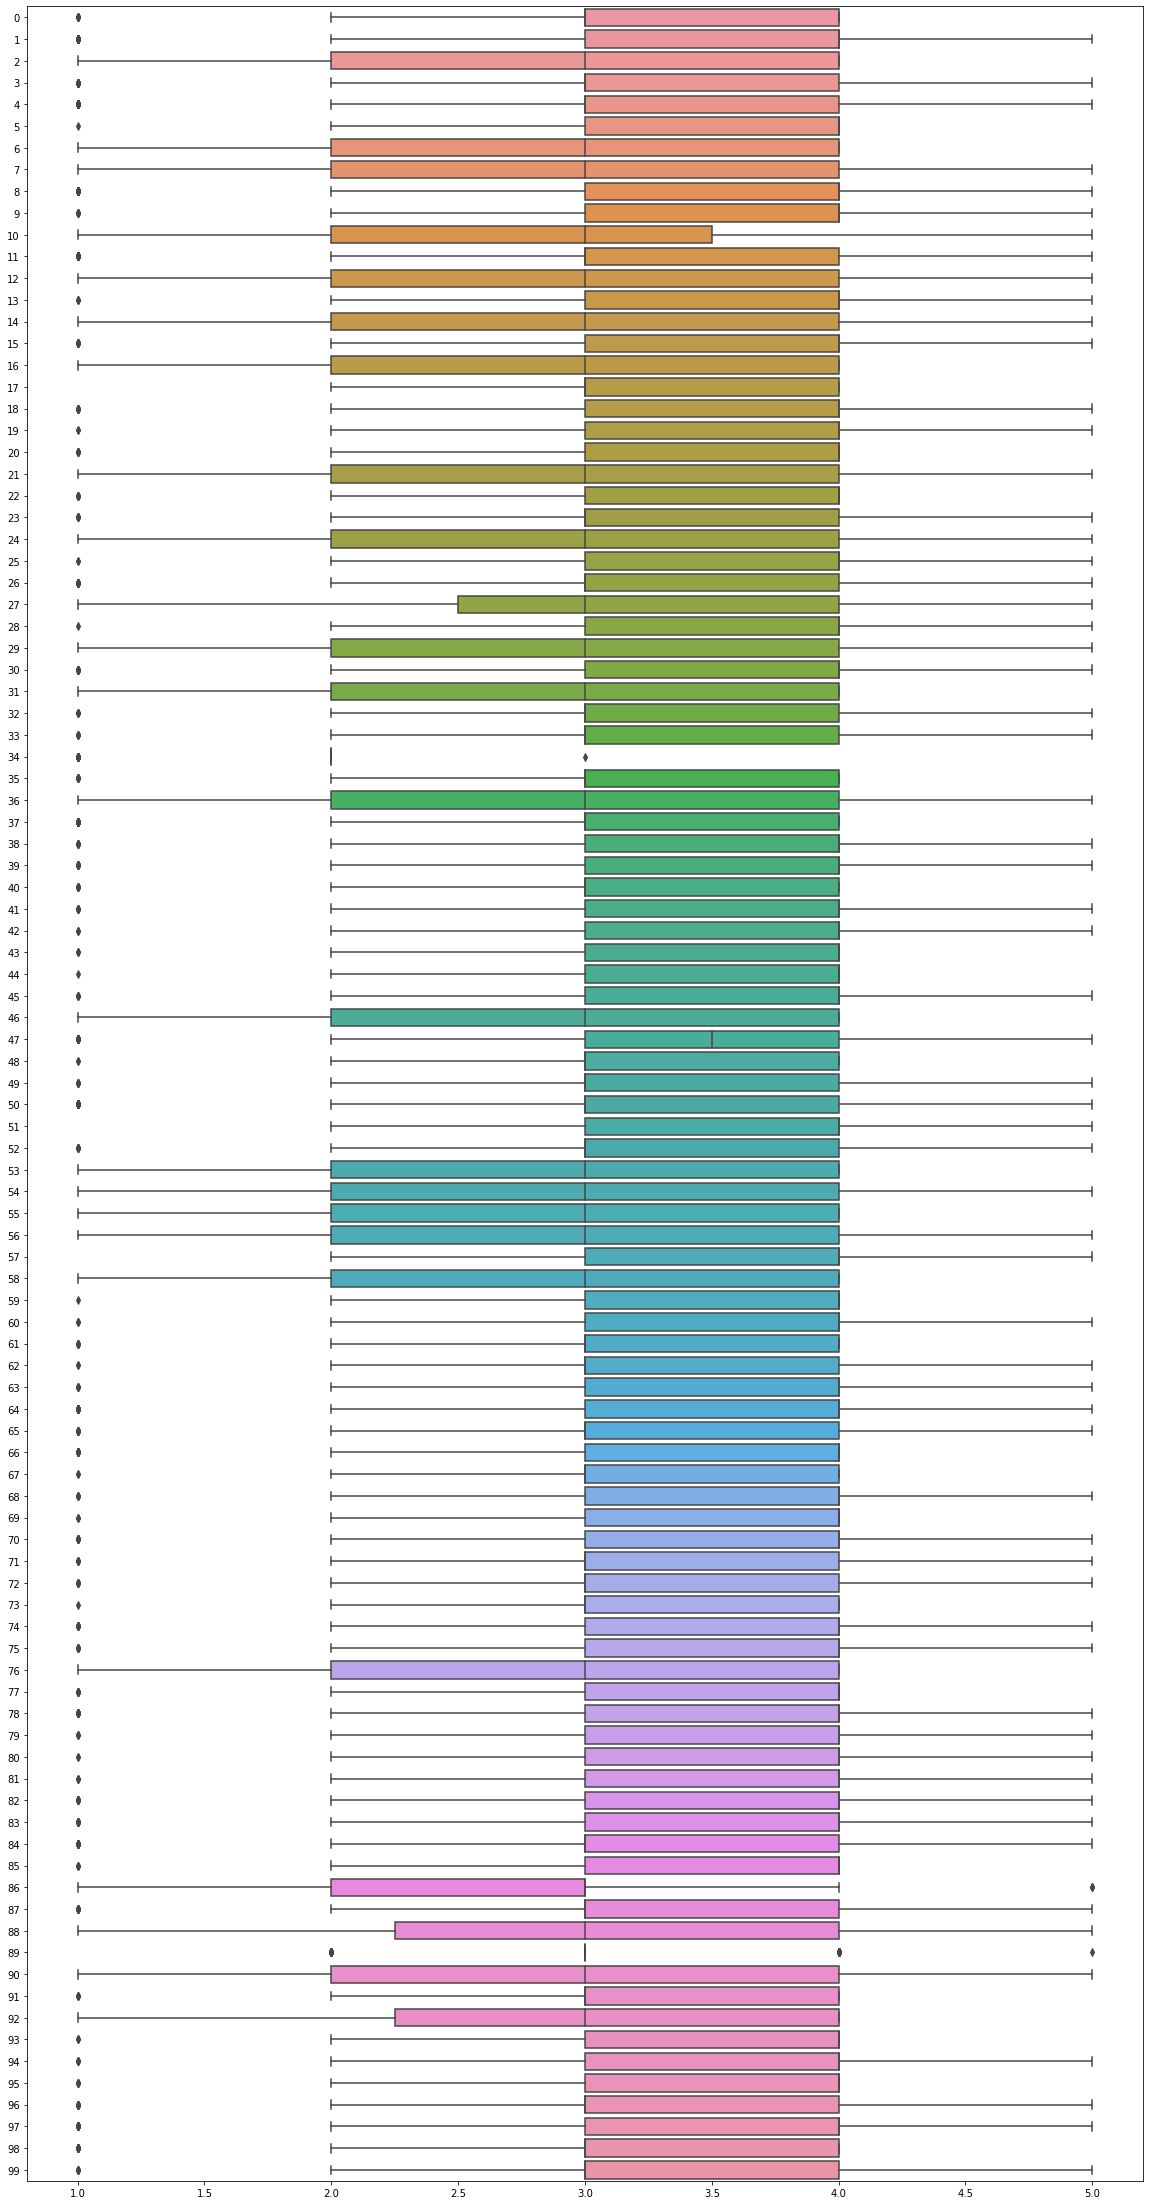

In [197]:
f = plt.figure(figsize=(20,40))
sb.boxplot( data= keyword_age, x='age_rating', y= 'keyword', orient='h')

In [199]:
hash_group = []
for keyword_list in df_clean_data_clean['keywords']:
    new =[]
    for keyword in keyword_list:
        j = 0
        for g in groups:
            if keyword in g:
                new.append(j)
                break
            j+=1
    hash_group.append(new)
hash_group

[[91, 59, 72, 34, 76, 84],
 [34, 29],
 [50, 50, 25, 4],
 [18, 55, 25, 8],
 [24, 89, 4, 70, 11, 84],
 [39, 65, 29],
 [90, 8, 1, 11],
 [64, 61],
 [4, 47, 45],
 [3, 31, 24, 83, 47, 15, 83, 98, 78, 68, 41],
 [41],
 [],
 [],
 [24, 89, 4, 86, 15, 84],
 [4, 34],
 [8, 67, 16, 99, 25, 34, 82],
 [24, 4, 12, 84],
 [84, 24, 24, 49, 56, 8],
 [87, 18, 25, 52, 63],
 [],
 [36, 29, 20, 69, 0, 40, 87, 12, 85, 38, 55, 97, 97, 60, 94, 17, 14, 45],
 [11, 99, 30],
 [90, 8, 4, 33, 18, 2, 33, 11],
 [4, 68],
 [53],
 [],
 [33, 24, 50, 65, 15, 63, 20, 4, 1, 82, 37, 54, 70, 84, 37],
 [78],
 [36, 91, 74, 47, 54],
 [78, 12, 88, 4, 4, 36, 15, 70, 14, 8, 18],
 [84, 37, 87, 14, 25, 25, 52, 24, 22],
 [],
 [24, 87, 89, 4, 8, 46, 54, 46, 86, 81, 24, 70],
 [],
 [87, 21],
 [89, 86, 1],
 [],
 [90, 18, 88, 78, 7, 33, 24, 10, 84, 8, 85],
 [97, 4, 25, 72, 74],
 [89, 4, 84, 87],
 [90, 69, 52, 71, 54],
 [24, 54, 52, 94, 66, 11, 10, 11],
 [34, 51],
 [39, 36, 4, 66, 70, 70, 39, 87],
 [98],
 [6, 70, 72, 6, 89, 4, 78, 24, 10],
 [91,

In [200]:
df_clean_data_clean['keywords'] = hash_group

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [203]:
#df_clean_data_clean =
df_clean_data_clean[ df_clean_data_clean['keywords']!=[] ]

ValueError: ('Lengths must match to compare', (4152,), (0,))

In [206]:
df_clean_data_clean = df_clean_data_clean[df_clean_data_clean['budget']!=0]

In [215]:
df_clean_data_clean = df_clean_data_clean[ df_clean_data_clean['keywords'].map(lambda d: len(d)) > 0 ]

In [217]:
df_final = df_clean_data_clean.reset_index()
df_final

,level_0,index,id,runtime,genres,keywords,production_companies,age_rating,actor,budget,popularity
0,1,1,587807,101,"[28, 35, 10751, 16, 12]","[34, 29]","[25120, 174, 8922, 77061]",PG,"[13620, 33923, 15098, 15831, 224092, 1688196, ...",50000000,2347.397
1,2,2,484718,110,[35],"[50, 50, 25, 4]","[4, 114732, 30, 11581, 20580]",PG-13,"[776, 44994, 1488960, 168452, 56903, 1884703, ...",60000000,1643.016
2,3,3,458576,104,"[14, 28, 12]","[18, 55, 25, 8]","[7220, 47, 248, 81620, 882, 3287, 34]",PG-13,"[63, 57207, 76126, 2372, 935201, 22122, 105605...",60000000,1765.484
3,4,4,464052,151,"[14, 28, 12]","[24, 89, 4, 70, 11, 84]","[9993, 174, 114152, 128064, 507, 429]",PG-13,"[90633, 62064, 41091, 1253360, 32, 935, 182998...",200000000,1914.199
4,5,6,581389,136,"[18, 14, 878]","[39, 65, 29]","[11589, 114519]",PG-13,"[150698, 1537768, 84996, 1989290, 30315, 84788...",21000000,1399.612
...,...,...,...,...,...,...,...,...,...,...,...
2988,4142,5455,4349,110,"[53, 28, 18]","[65, 29, 50, 46, 53, 97, 70, 8, 97, 57]","[33, 675, 7295, 7786, 12246]",R,"[134, 9278, 2955, 23532, 762, 12799, 766, 2863...",70000000,12.254
2989,4143,5456,17814,91,"[53, 28, 80]","[0, 33, 65, 27, 8, 47, 50, 26, 1, 64, 83, 67, 19]","[888, 3403]",R,"[103707, 105624, 109944, 109945, 16504, 11786,...",150000,10.502
2990,4144,5457,2897,175,"[12, 35, 10751, 14, 10749]","[36, 49, 67, 90, 46, 64, 44, 33, 61, 22, 56, 7...",[1258],G,"[14261, 29518, 10027, 6599, 29519, 29520, 2927...",6000000,13.003
2991,4145,5459,55721,125,"[35, 10749]","[65, 37, 90, 32, 87, 41, 53, 83, 78]","[10105, 33, 7295]",R,"[41091, 52792, 9827, 63234, 475512, 55536, 404...",32500000,14.756
